Wine Dataset

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True,return_X_y=False)
wine = pd.concat([wine.data,wine.target],axis=1)
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [3]:
wine.shape

(178, 14)

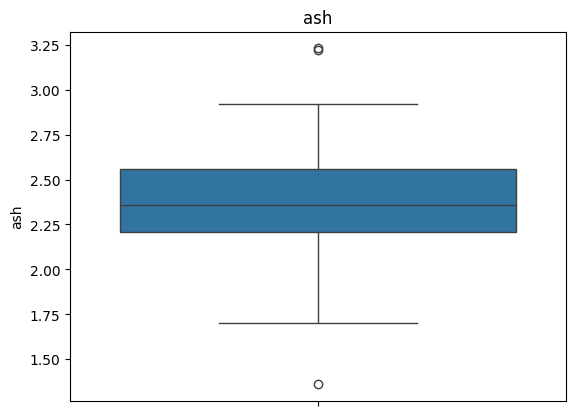

In [4]:
col_name = 'ash'
sns.boxplot(data=wine,y=col_name)
plt.title(col_name)
plt.show()

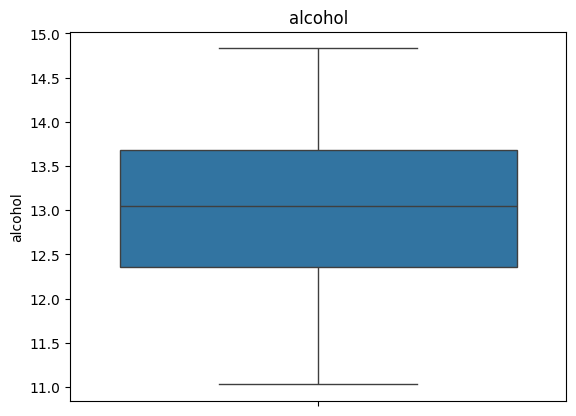

In [5]:
col_name = 'alcohol'
sns.boxplot(data=wine,y=col_name)
plt.title(col_name)
plt.show()

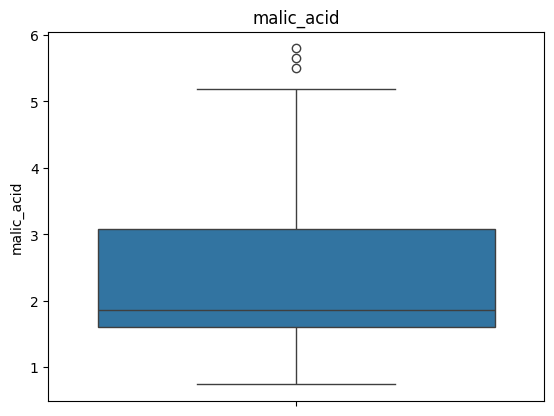

In [6]:
col_name = 'malic_acid'
sns.boxplot(data=wine,y=col_name)
plt.title(col_name)
plt.show()

In [7]:
wine['ash'].quantile([0.25,0.5,0.75])

0.25    2.2100
0.50    2.3600
0.75    2.5575
Name: ash, dtype: float64

In [8]:
wine['malic_acid'].quantile()


1.8650000000000002

In [9]:
iqr=wine['malic_acid'].quantile()-wine['malic_acid'].quantile(0.25)
iqr

0.2625000000000002

In [10]:
def detect_outliers(col_name,df):
    iqr=df[col_name].quantile(0.75)-df[col_name].quantile(0.25)
    lower=list(df[df[col_name]<df[col_name].quantile(0.25)-1.5*iqr][col_name])
    upper=list(df[df[col_name]>df[col_name].quantile(0.75)+1.5*iqr][col_name])
    return (lower,upper)

In [11]:
detect_outliers('alcohol',wine)

([], [])

In [12]:
for col in list(wine.columns):
    lower,upper = detect_outliers(col,wine)
    print("Variabel:",col, ",Lower:",lower,",Upper:",upper)

Variabel: alcohol ,Lower: [] ,Upper: []
Variabel: malic_acid ,Lower: [] ,Upper: [5.8, 5.51, 5.65]
Variabel: ash ,Lower: [1.36] ,Upper: [3.22, 3.23]
Variabel: alcalinity_of_ash ,Lower: [10.6] ,Upper: [30.0, 28.5, 28.5]
Variabel: magnesium ,Lower: [] ,Upper: [151.0, 139.0, 136.0, 162.0]
Variabel: total_phenols ,Lower: [] ,Upper: []
Variabel: flavanoids ,Lower: [] ,Upper: []
Variabel: nonflavanoid_phenols ,Lower: [] ,Upper: []
Variabel: proanthocyanins ,Lower: [] ,Upper: [3.28, 3.58]
Variabel: color_intensity ,Lower: [] ,Upper: [10.8, 13.0, 11.75, 10.68]
Variabel: hue ,Lower: [] ,Upper: [1.71]
Variabel: od280/od315_of_diluted_wines ,Lower: [] ,Upper: []
Variabel: proline ,Lower: [] ,Upper: []
Variabel: target ,Lower: [] ,Upper: []
